# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Reading Data

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Making Copy of the Data

In [3]:
df = data.copy()

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


###  Renaming attributes label with meaningful name

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [7]:
df.rename(columns = {'cp' : 'ChestPainType', 'trtbps' : 'BloodPressure', 'chol' : 'cholestoral', 'fbs' : 'Bloodsugar', 'restecg' : 'ECG',
                     'thalachh' : 'Max_heartrate','exng' : 'Ex_Pain',
                     'slp' : 'slope', 'caa' : 'No_of_vassels', 'thall' : 'Thalassemia', 'output' : 'Target'}, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   ChestPainType  303 non-null    int64  
 3   BloodPressure  303 non-null    int64  
 4   cholestoral    303 non-null    int64  
 5   Bloodsugar     303 non-null    int64  
 6   ECG            303 non-null    int64  
 7   Max_heartrate  303 non-null    int64  
 8   Ex_Pain        303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  No_of_vassels  303 non-null    int64  
 12  Thalassemia    303 non-null    int64  
 13  Target         303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# **Exploratory Data Analysis**

### Checking for the Shape

In [9]:
df.shape

(303, 14)

### Checking for the Numerical Summary

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
ChestPainType,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
BloodPressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholestoral,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
Bloodsugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
ECG,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
Max_heartrate,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
Ex_Pain,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Checking for Missing Values

In [11]:
df.isnull().sum()

age              0
sex              0
ChestPainType    0
BloodPressure    0
cholestoral      0
Bloodsugar       0
ECG              0
Max_heartrate    0
Ex_Pain          0
oldpeak          0
slope            0
No_of_vassels    0
Thalassemia      0
Target           0
dtype: int64

### Checking for Duplicates

In [12]:
dup = df[df.duplicated()]
dup

,age,sex,ChestPainType,BloodPressure,cholestoral,Bloodsugar,ECG,Max_heartrate,Ex_Pain,oldpeak,slope,No_of_vassels,Thalassemia,Target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


### Dropping the duplicate rows (In this dataset, we have only one duplicate row)

In [13]:
df.shape

(303, 14)

In [14]:
df = df.drop_duplicates()
df.shape

(302, 14)

## **UNIVARIATE ANALYSIS**

**1. AGE**

Checking Distribution

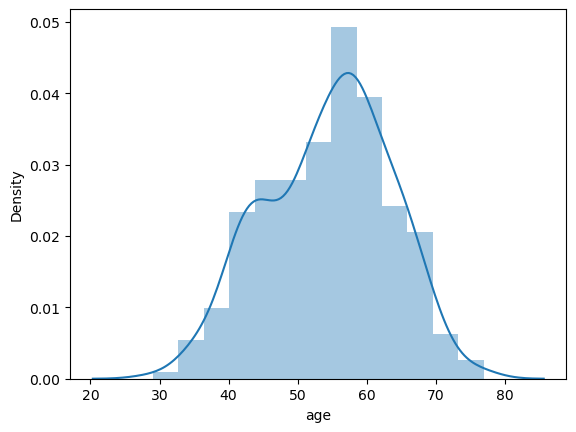

In [15]:
sns.distplot(df.age);
plt.savefig('Age.png')

checking for Outliers

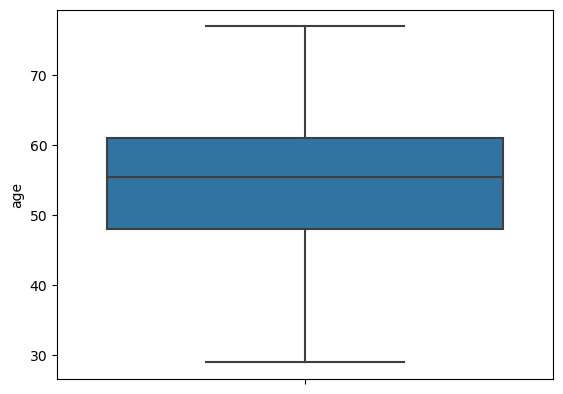

In [16]:
sns.boxplot(y = 'age',data = df);

Checking Skewness

In [17]:
df.age.skew()

-0.2037432795959691

**2.SEX**

Checking Counts of the Male and Female

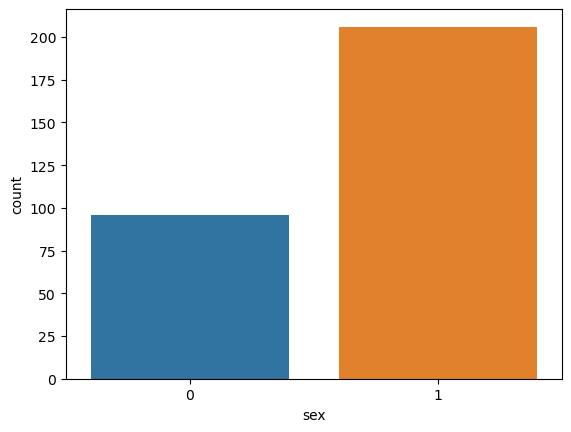

In [18]:
sns.countplot(x = 'sex', data = df);
plt.savefig('sex.png')

In [19]:
df.sex.value_counts()

1    206
0     96
Name: sex, dtype: int64

In [20]:
df.sex.value_counts(normalize = True)

1    0.682119
0    0.317881
Name: sex, dtype: float64

**3. Chest Pain Type**

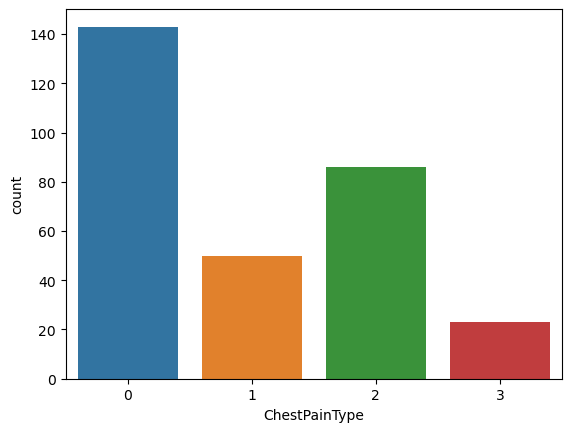

In [21]:
sns.countplot(x = 'ChestPainType', data = df);
plt.savefig('ChestPainType.png')

In [22]:
df['ChestPainType'].value_counts()

0    143
2     86
1     50
3     23
Name: ChestPainType, dtype: int64

In [23]:
df['ChestPainType'].value_counts(normalize = True)

0    0.473510
2    0.284768
1    0.165563
3    0.076159
Name: ChestPainType, dtype: float64

**4.BloodPressure**

Checking Distribution

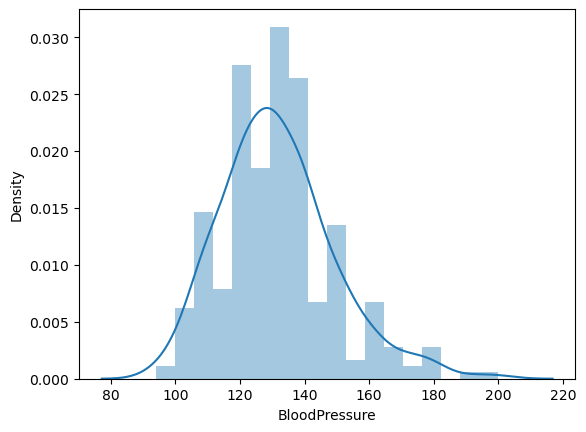

In [24]:
sns.distplot(df.BloodPressure);
plt.savefig('BloodPressure.png')

Checking for Outliers

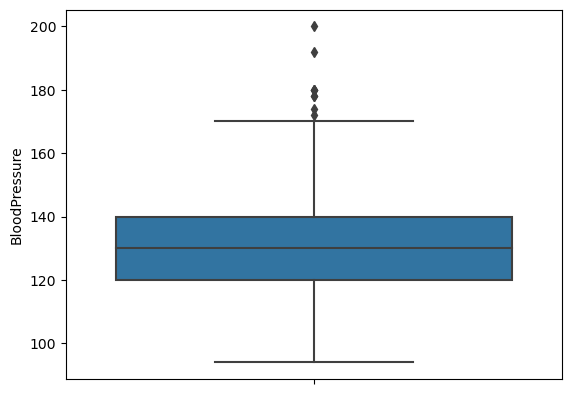

In [25]:
sns.boxplot(y = 'BloodPressure', data = df);
plt.savefig('BloodPressure_OUTLIERS.png')

Checking Skewness

In [26]:
df.BloodPressure.skew()

0.7165414326647318

**5. cholestoral**

Checking Distribution

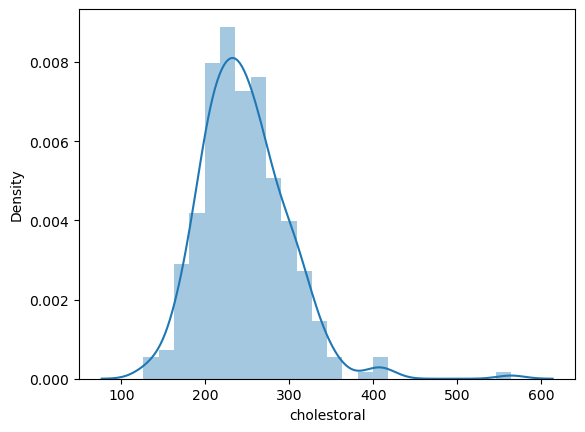

In [27]:
sns.distplot(df.cholestoral);
plt.savefig('cholestoral.png')

Checking for Outliers

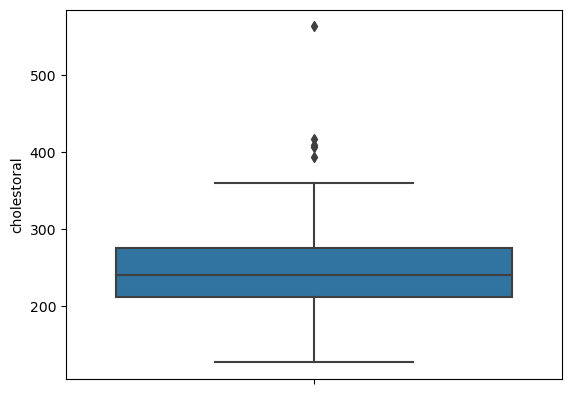

In [28]:
sns.boxplot(y ='cholestoral', data = df);

Checking for Skewness

In [29]:
df.cholestoral.skew()

1.147332413980798

**6. Bloodsugar**

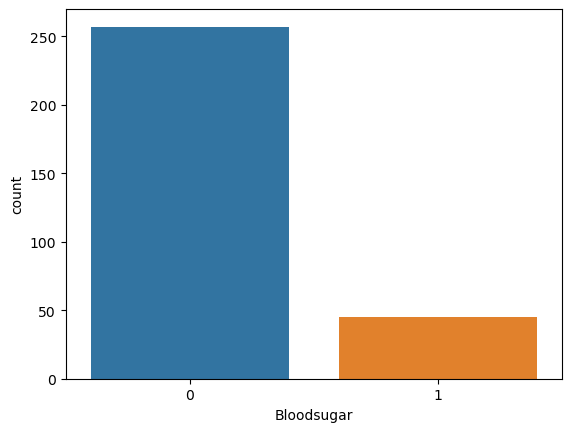

In [30]:
sns.countplot(x = 'Bloodsugar', data = df);
plt.savefig('Bloodsugar.png')

In [31]:
df.Bloodsugar.value_counts()

0    257
1     45
Name: Bloodsugar, dtype: int64

**7. ECG**

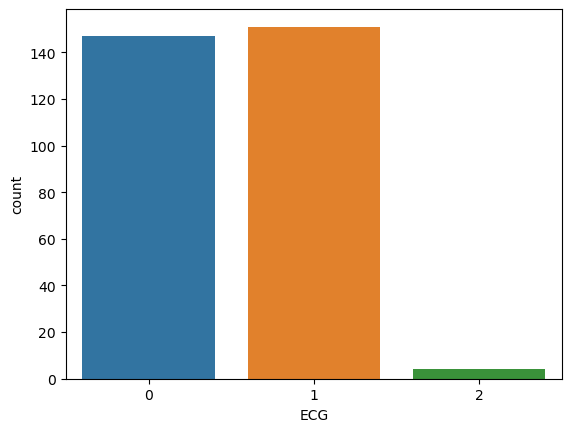

In [32]:
sns.countplot(x = 'ECG', data = df);
plt.savefig('ECG.png')

In [33]:
df.ECG.value_counts()

1    151
0    147
2      4
Name: ECG, dtype: int64

**8. Max_heartrate**

Checking Distribution

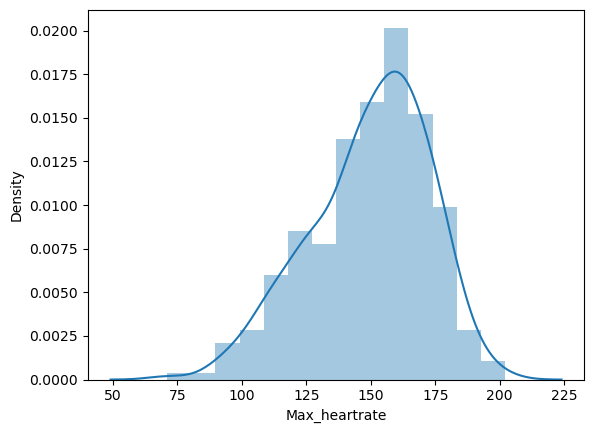

In [34]:
sns.distplot(df.Max_heartrate);
plt.savefig('Max_heartrate.png')

Checking for Outliers

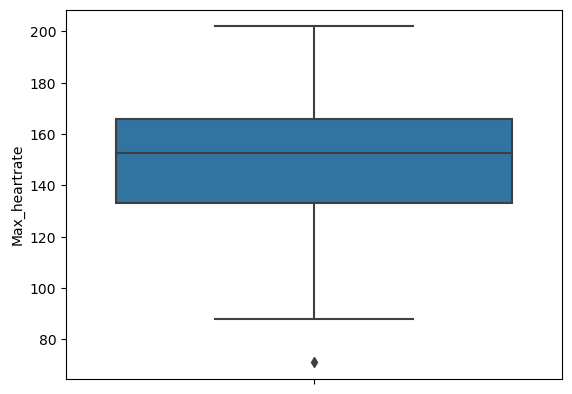

In [35]:
sns.boxplot(y = 'Max_heartrate', data = df);

Checking for Skewness

In [36]:
df['Max_heartrate'].skew()

-0.5326712468229611

**9. Ex-Pain**

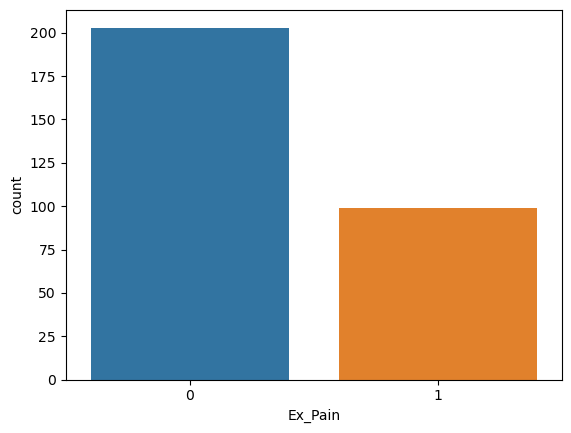

In [37]:
sns.countplot(x = 'Ex_Pain',data = df);
plt.savefig('Ex_Pain.png')

In [38]:
df['Ex_Pain'].value_counts()

0    203
1     99
Name: Ex_Pain, dtype: int64

**10. No_of_vassels**

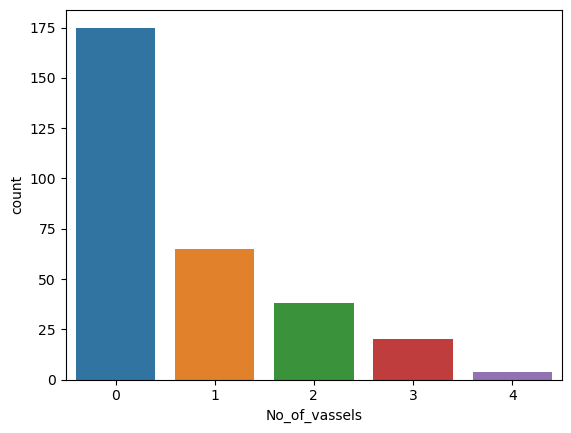

In [39]:
sns.countplot(x = 'No_of_vassels', data = df);
plt.savefig('No_of_vassels.png')

In [40]:
df['No_of_vassels'].value_counts()

0    175
1     65
2     38
3     20
4      4
Name: No_of_vassels, dtype: int64

**11. Thalassemia**

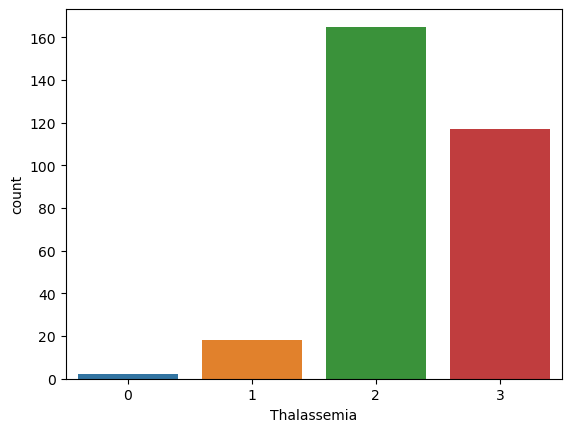

In [41]:
sns.countplot(x = 'Thalassemia', data = df);
plt.savefig('Thalassemia.png')

In [42]:
df['Thalassemia'].value_counts()

2    165
3    117
1     18
0      2
Name: Thalassemia, dtype: int64

**12. Target**

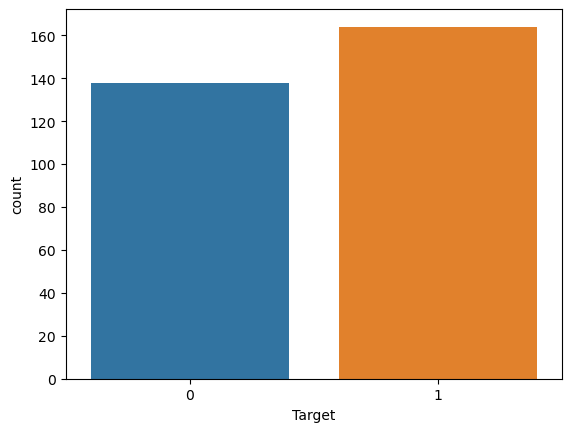

In [43]:
sns.countplot(x = 'Target', data = df);
plt.savefig('Target.png')

In [44]:
df.Target.value_counts()

1    164
0    138
Name: Target, dtype: int64

# **BIVARIATE ANALYSIS**

**1. TARGET vs AGE**

Visualizing Boxplot to observe the variation in means of age accross Target(Heart Disease)

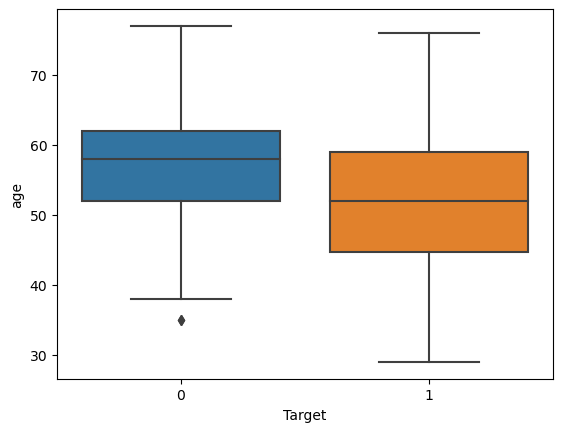

In [45]:
sns.boxplot(x='Target', y='age', data=df);
plt.savefig('TargetVSAge.png')

Checking for Pointbiserial correlation coefficient

In [46]:
from scipy.stats import pointbiserialr

result = pointbiserialr(df['Target'], df['age'])
result


PointbiserialrResult(correlation=-0.22147582776656216, pvalue=0.00010394837285416585)

Checking the relation using ANOVA

In [47]:
from scipy.stats import f_oneway

result = f_oneway(df['Target'], df['age'])
result


F_onewayResult(statistic=10675.801467178899, pvalue=0.0)

**2. TARGET vs BloodPressure**

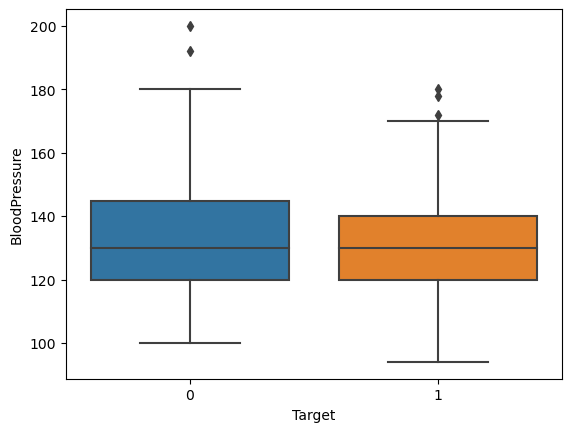

In [48]:
sns.boxplot(x = 'Target', y = 'BloodPressure', data = df);
plt.savefig('TargetVSBloodPressure.png')

In [49]:
Anova  = f_oneway(df['Target'],df['BloodPressure'])
Anova

F_onewayResult(statistic=16802.63353429235, pvalue=0.0)

In [50]:
Pointbiserial = pointbiserialr(df['Target'],df['BloodPressure'])
Pointbiserial


PointbiserialrResult(correlation=-0.14626866384155449, pvalue=0.010926538861948852)

**3. TARGET vs Bloodsugar**

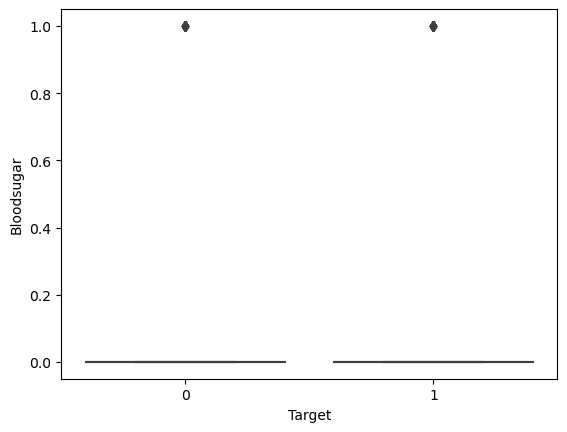

In [51]:
sns.boxplot(x = 'Target', y = 'Bloodsugar', data = df);
plt.savefig('TargetVSBloodsugar.png')

In [52]:
Anova = f_oneway(df['Target'], df['Bloodsugar'])
Anova

F_onewayResult(statistic=124.64429628329971, pvalue=1.959031201755257e-26)

In [53]:
Pointbiserial = pointbiserialr(df['Target'], df['Bloodsugar'])
Pointbiserial

PointbiserialrResult(correlation=-0.026825970565970247, pvalue=0.6424070490676401)

**4. TARGET vs MAX_HEARTRATE**

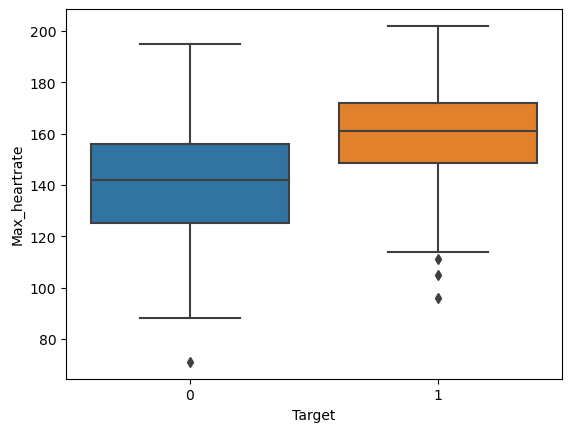

In [54]:
sns.boxplot(x = 'Target', y = 'Max_heartrate', data = df);
plt.savefig('TargetVSMax_heartrate.png')

In [55]:
Anova = f_oneway(df['Target'], df['Max_heartrate'])
Anova

F_onewayResult(statistic=12779.770993985023, pvalue=0.0)

In [56]:
Pointbiserial = pointbiserialr(df['Target'], df['Max_heartrate'])
Pointbiserial

PointbiserialrResult(correlation=0.41995504366387004, pvalue=2.4761460479234043e-14)

**5. TARGET vs Thalassemia**

In [57]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Target'], df['Thalassemia'])

# Perform Chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Interpret the results
# If p-value < significance level (e.g., 0.05), reject the null hypothesis of independence.


In [58]:
chi2, p

(84.61031794685029, 3.146295138318122e-18)

In [59]:
contingency_table

Thalassemia,0,1,2,3
Target,,,,
0,1,12,36,89
1,1,6,129,28


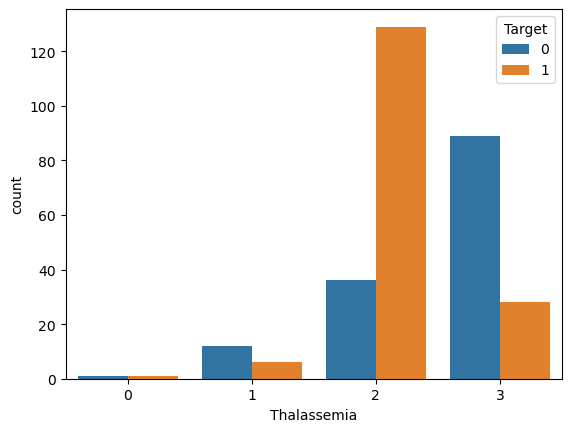

In [60]:
sns.countplot(x = 'Thalassemia',data = df,hue = 'Target');
plt.savefig('TargetVSThalassemia.png')

**6. TARGET vs No_of_vassels**

In [61]:
# Create a contingency table
contingency_table = pd.crosstab(df['Target'], df['No_of_vassels'])

# Perform Chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

chi2, p

(73.68984583164412, 3.771038067427657e-15)

In [62]:
contingency_table

No_of_vassels,0,1,2,3,4
Target,,,,,
0,45,44,31,17,1
1,130,21,7,3,3


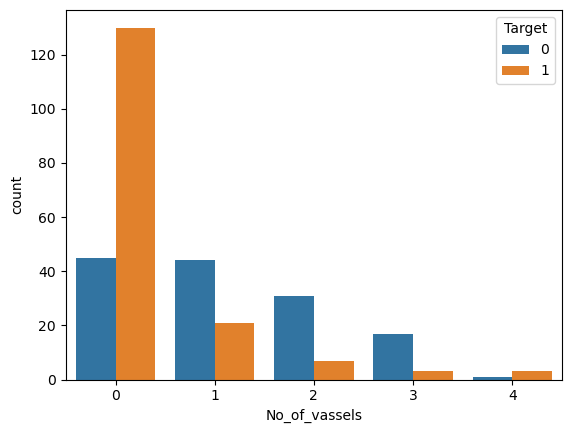

In [63]:
sns.countplot(x = 'No_of_vassels',data = df,hue = 'Target');
plt.savefig('TargetVSNo_of_vassel.png')

**7. TARGET vs SLOPE**

In [64]:
contigency_table = pd.crosstab(df['Target'], df['slope'])

chi2,p,_,_ = chi2_contingency(contigency_table)

chi2, p

(46.88947660161814, 6.5777827609179e-11)

In [65]:
contigency_table

slope,0,1,2
Target,,,
0,12,91,35
1,9,49,106


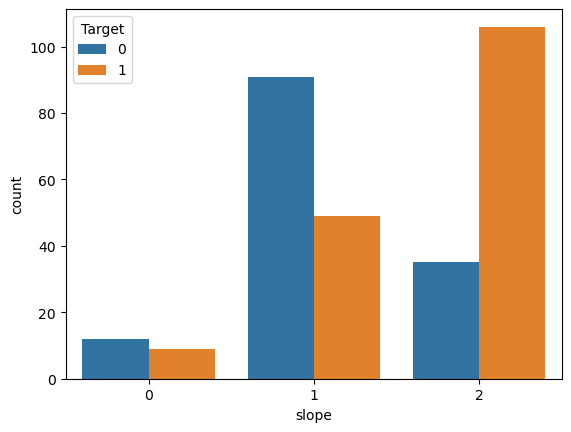

In [66]:
sns.countplot(x = 'slope', data = df, hue = 'Target');
plt.savefig('TargetVSslope.png')

# **MULTIVARIATE ANALYSIS**

Creating a heatmap to visualize the correlation matrix

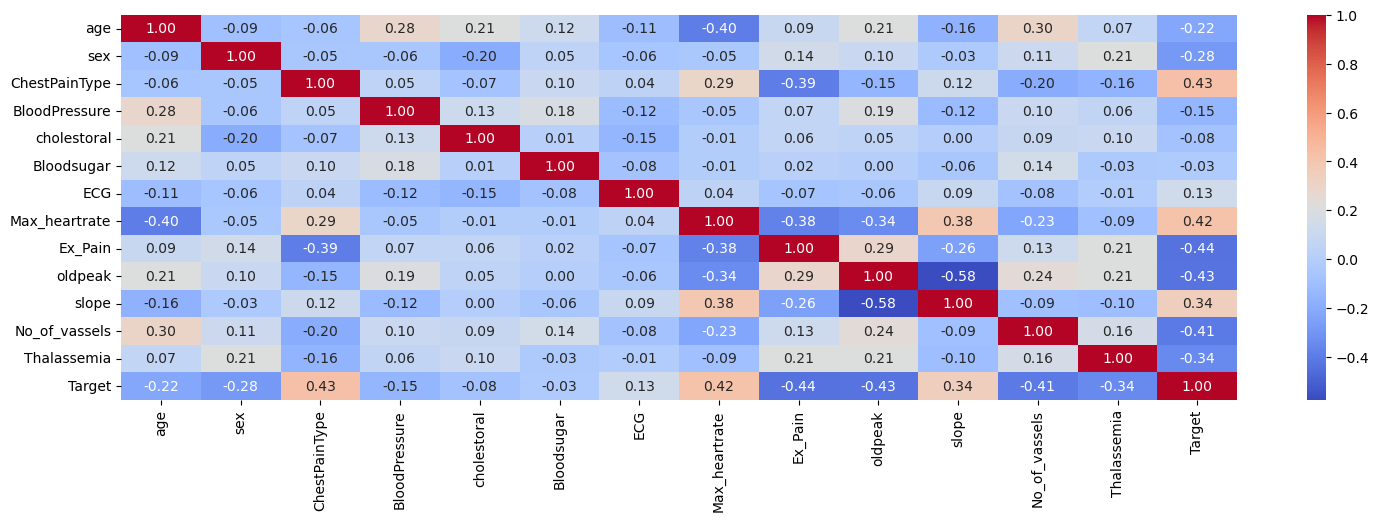

In [67]:
correlation_matrix = df.corr()
plt.figure(figsize=(18,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.savefig('Multivariate.png')
plt.show()

In [68]:
df.columns

Index(['age', 'sex', 'ChestPainType', 'BloodPressure', 'cholestoral',
       'Bloodsugar', 'ECG', 'Max_heartrate', 'Ex_Pain', 'oldpeak', 'slope',
       'No_of_vassels', 'Thalassemia', 'Target'],
      dtype='object')


Performing Hypothesis Testing to analyse the relationship among Dependent and Independent Variables.

H(O):There is no any relationship among Dependent and Independent Variables.

H(A):There exists a strong relationship among Dependent and Independent Variables.

Taking Level of Significance (ALPHA) = 0.05

I will reject the Null Hypothesis for those variables having p-value less than alpha, signifying association existing among them.



In [69]:
import statsmodels.formula.api as smf

In [70]:
Model = smf.ols(
    formula = 'Target ~ age + sex + ChestPainType + BloodPressure + cholestoral + Bloodsugar + ECG + Max_heartrate + Ex_Pain + oldpeak + slope + No_of_vassels + Thalassemia' , data = df)

In [71]:
Result = Model.fit()

In [72]:
print(Result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     23.88
Date:                Mon, 15 Jan 2024   Prob (F-statistic):           1.48e-38
Time:                        20:17:07   Log-Likelihood:                -107.62
No. Observations:                 302   AIC:                             243.2
Df Residuals:                     288   BIC:                             295.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8156      0.293      2.785

'''
Variables which are having statistically significant relationships are as follows:
1)sex
2)ChestPainType 
3)Max_heartrate 
4)Ex_Pain 
5)oldpeak 
6)No_of_vassels 
7)Thalassemia
'''

In [73]:
Model3 = smf.ols(
    formula = 'Target ~  sex + ChestPainType + Max_heartrate + Ex_Pain + oldpeak  + No_of_vassels + Thalassemia' , data = df)

Result = Model3.fit()
print(Result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     42.32
Date:                Mon, 15 Jan 2024   Prob (F-statistic):           4.69e-41
Time:                        20:17:07   Log-Likelihood:                -112.82
No. Observations:                 302   AIC:                             241.6
Df Residuals:                     294   BIC:                             271.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5488      0.180      3.046

# Preprocessing data for Logistic Regrassion


In [74]:
df.columns

Index(['age', 'sex', 'ChestPainType', 'BloodPressure', 'cholestoral',
       'Bloodsugar', 'ECG', 'Max_heartrate', 'Ex_Pain', 'oldpeak', 'slope',
       'No_of_vassels', 'Thalassemia', 'Target'],
      dtype='object')

## Creating DataFrame of only those independent variables those are having association with Target Variables.

In [75]:
df = df[['sex', 'ChestPainType',
       'Max_heartrate', 'Ex_Pain', 'oldpeak',
       'No_of_vassels', 'Thalassemia', 'Target']]

In [76]:
df.shape

(302, 8)

In [77]:
df.head()

,sex,ChestPainType,Max_heartrate,Ex_Pain,oldpeak,No_of_vassels,Thalassemia,Target
0,1,3,150,0,2.3,0,1,1
1,1,2,187,0,3.5,0,2,1
2,0,1,172,0,1.4,0,2,1
3,1,1,178,0,0.8,0,2,1
4,0,0,163,1,0.6,0,2,1


## Splitting Data

In [78]:
X = df.iloc[:,0:6]
y = df.iloc[:,-1]

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=78)

In [81]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((241, 6), (61, 6), (241,), (61,))

## Feature Scaling using MinMax Scaler

In [82]:
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
df_train = pd.DataFrame(MM.fit_transform(X_train),columns = X_train.columns)
df_train.head()

,sex,ChestPainType,Max_heartrate,Ex_Pain,oldpeak,No_of_vassels
0,1.0,1.000000,0.847328,1.0,0.612903,0.00
1,0.0,0.000000,0.564885,0.0,1.000000,0.75
2,0.0,0.333333,0.770992,0.0,0.225806,0.00
3,1.0,0.666667,0.572519,0.0,0.322581,0.75
4,1.0,0.000000,0.557252,1.0,0.225806,0.25


## Traing the Model using Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [84]:
y_pred = clf.predict(X_train)

## Importing Matrices 

In [85]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay

In [86]:
accuracy_score(y_train,y_pred)

0.8506224066390041

In [87]:
print(confusion_matrix(y_train,y_pred))

[[ 80  23]
 [ 13 125]]


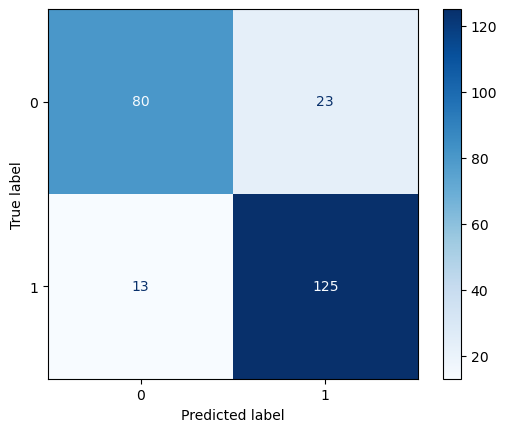

In [88]:
cm = confusion_matrix(y_train,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues);
plt.savefig('CM_Training.png')

In [89]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       103
           1       0.84      0.91      0.87       138

    accuracy                           0.85       241
   macro avg       0.85      0.84      0.85       241
weighted avg       0.85      0.85      0.85       241



## Validating the Model with test dataset

In [90]:
y_pred = clf.predict(X_test)

In [91]:
accuracy_score(y_test,y_pred)

0.819672131147541

In [92]:
print(confusion_matrix(y_test,y_pred))

[[28  7]
 [ 4 22]]


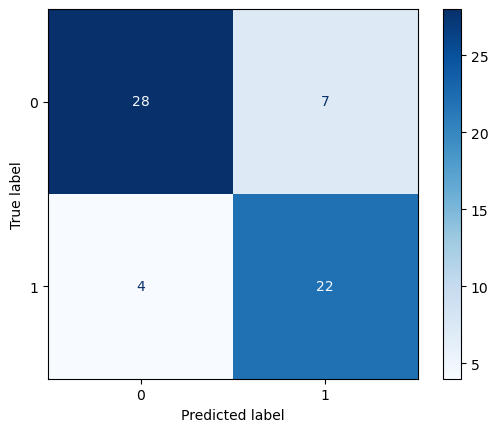

In [93]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues);
plt.savefig('CM_Test.png')

In [94]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84        35
           1       0.76      0.85      0.80        26

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



## Checking for Sensitivity and Specificity 

In [95]:
confusion_matrix = cm
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.875
Specificity :  0.7586206896551724


## Plotting ROC - Curve

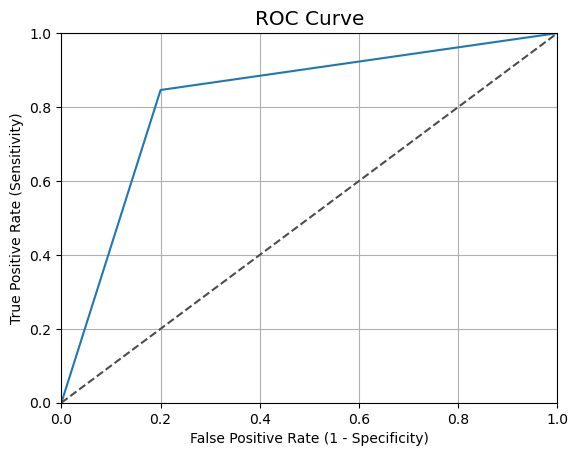

In [96]:
from sklearn.metrics import roc_curve, auc #for model evaluation
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.savefig('ROC_CURVE.png')


### Preparing Data for SQL Analysis

In [97]:
df

,sex,ChestPainType,Max_heartrate,Ex_Pain,oldpeak,No_of_vassels,Thalassemia,Target
0,1,3,150,0,2.3,0,1,1
1,1,2,187,0,3.5,0,2,1
2,0,1,172,0,1.4,0,2,1
3,1,1,178,0,0.8,0,2,1
4,0,0,163,1,0.6,0,2,1
...,...,...,...,...,...,...,...,...
298,0,0,123,1,0.2,0,3,0
299,1,3,132,0,1.2,0,3,0
300,1,0,141,0,3.4,2,3,0
301,1,0,115,1,1.2,1,3,0


In [98]:
df['Target'] = df['Target'].replace({1: 'Heart_Patient', 0: 'Normal_Patient'})
df['Thalassemia']       = df['Thalassemia'].replace({0: 'Fit',1: 'Normal', 2:'fixed_defect',3:'reversable_defect'})
df['ChestPainType']     = df['ChestPainType'].replace({1: 'typical angina', 2: 'atypical_angina', 3: 'non_anginal_pain', 4: 'asymptotic'})
df['sex']               = df['sex'].replace({1: 'Male', 0: 'Female'})
df['Ex_Pain']           = df['Ex_Pain'].replace({1: 'Exercise_induced_angina', 0: 'Non_Exercise_induced_angina'})


In [99]:
df

,sex,ChestPainType,Max_heartrate,Ex_Pain,oldpeak,No_of_vassels,Thalassemia,Target
0,Male,non_anginal_pain,150,Non_Exercise_induced_angina,2.3,0,Normal,Heart_Patient
1,Male,atypical_angina,187,Non_Exercise_induced_angina,3.5,0,fixed_defect,Heart_Patient
2,Female,typical angina,172,Non_Exercise_induced_angina,1.4,0,fixed_defect,Heart_Patient
3,Male,typical angina,178,Non_Exercise_induced_angina,0.8,0,fixed_defect,Heart_Patient
4,Female,0,163,Exercise_induced_angina,0.6,0,fixed_defect,Heart_Patient
...,...,...,...,...,...,...,...,...
298,Female,0,123,Exercise_induced_angina,0.2,0,reversable_defect,Normal_Patient
299,Male,non_anginal_pain,132,Non_Exercise_induced_angina,1.2,0,reversable_defect,Normal_Patient
300,Male,0,141,Non_Exercise_induced_angina,3.4,2,reversable_defect,Normal_Patient
301,Male,0,115,Exercise_induced_angina,1.2,1,reversable_defect,Normal_Patient


In [102]:
file_name = 'HeartData.csv'
df.to_csv(file_name,index = False)

In [103]:
df.columns

Index(['sex', 'ChestPainType', 'Max_heartrate', 'Ex_Pain', 'oldpeak',
       'No_of_vassels', 'Thalassemia', 'Target'],
      dtype='object')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sex            302 non-null    object 
 1   ChestPainType  302 non-null    object 
 2   Max_heartrate  302 non-null    int64  
 3   Ex_Pain        302 non-null    object 
 4   oldpeak        302 non-null    float64
 5   No_of_vassels  302 non-null    int64  
 6   Thalassemia    302 non-null    object 
 7   Target         302 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 21.2+ KB
